In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

In [2]:
questions = pd.read_csv('Dataset/Questions.csv',encoding='latin-1')

In [3]:
print(questions.columns)

Index(['Id', 'OwnerUserId', 'CreationDate', 'Score', 'Title', 'Body'], dtype='object')


In [4]:
print("Number of Questions in the Dataset: ",len(questions))

Number of Questions in the Dataset:  607282


In [5]:
questions.head()

,Id,OwnerUserId,CreationDate,Score,Title,Body
0,469,147.0,2008-08-02T15:11:16Z,21,How can I find the full path to a font from it...,<p>I am using the Photoshop's javascript API t...
1,502,147.0,2008-08-02T17:01:58Z,27,Get a preview JPEG of a PDF on Windows?,<p>I have a cross-platform (Python) applicatio...
2,535,154.0,2008-08-02T18:43:54Z,40,Continuous Integration System for a Python Cod...,<p>I'm starting work on a hobby project with a...
3,594,116.0,2008-08-03T01:15:08Z,25,cx_Oracle: How do I iterate over a result set?,<p>There are several ways to iterate over a re...
4,683,199.0,2008-08-03T13:19:16Z,28,Using 'in' to match an attribute of Python obj...,<p>I don't remember whether I was dreaming or ...


In [6]:
answers = pd.read_csv('Dataset/Answers.csv',encoding = 'latin-1')

In [7]:
print(answers.columns)

Index(['Id', 'OwnerUserId', 'CreationDate', 'ParentId', 'Score', 'Body'], dtype='object')


In [8]:
print("Number of Answers: ",len(answers))

Number of Answers:  987122


In [9]:
answers.head()

,Id,OwnerUserId,CreationDate,ParentId,Score,Body
0,497,50.0,2008-08-02T16:56:53Z,469,4,<p>open up a terminal (Applications-&gt;Utilit...
1,518,153.0,2008-08-02T17:42:28Z,469,2,<p>I haven't been able to find anything that d...
2,536,161.0,2008-08-02T18:49:07Z,502,9,<p>You can use ImageMagick's convert utility f...
3,538,156.0,2008-08-02T18:56:56Z,535,23,<p>One possibility is Hudson. It's written in...
4,541,157.0,2008-08-02T19:06:40Z,535,20,"<p>We run <a href=""http://buildbot.net/trac"">B..."


In [10]:
tags = pd.read_csv('Dataset/Tags.csv',encoding = 'latin-1')

In [11]:
print(tags.columns)

Index(['Id', 'Tag'], dtype='object')


In [12]:
print("Number of tags : ",len(tags))

Number of tags :  1885078


In [13]:
tags.head()

,Id,Tag
0,469,python
1,469,osx
2,469,fonts
3,469,photoshop
4,502,python


In [14]:
print("Number of unique Tags : ",len(tags['Tag'].unique()))

Number of unique Tags :  16896


In [15]:
countOfTag=tags['Tag'].value_counts()
countTags=tags[tags.Tag.isin(countOfTag.index[countOfTag.gt(1000)])]
print("Number of Tags which have appeared more than 1000 times: ",len(countTags.Tag.unique()))

Number of Tags which have appeared more than 1000 times:  207


In [16]:
print("Tage which have appeared more than 1000 times: ")
print(countTags.Tag.unique())

Tage which have appeared more than 1000 times: 
['python' 'osx' 'windows' 'image' 'pdf' 'sql' 'database' 'arrays'
 'iteration' 'django' 'oop' 'mysql' 'postgresql' 'methods' 'syntax' 'xml'
 'list' 'tuples' 'php' 'user-interface' 'tkinter' 'linux' 'ruby' 'apache'
 'c' 'matlab' 'unicode' 'urllib' 'xpath' 'c++' 'unit-testing' 'lxml'
 'loops' 'string' 'regex' 'audio' 'ctypes' 'object' 'matrix' 'orm'
 'django-models' 'java' 'datetime' 'subprocess' 'git' 'io' 'gtk' 'pygtk'
 'pygame' 'wxpython' 'perl' 'multithreading' 'file-io' 'ssh' 'performance'
 'http' 'html' 'shell' 'google-app-engine' 'sorting' 'mod-wsgi'
 'python-3.x' 'parsing' 'inheritance' 'variables' 'dictionary' 'file'
 'javascript' 'authentication' 'python-2.x' 'date' 'url' 'cgi' 'wsgi'
 'math' 'debugging' 'list-comprehension' 'generator' 'sqlalchemy'
 'networking' 'for-loop' 'encryption' 'numpy' 'mongodb' 'time' 'path'
 'optimization' 'jython' 'ajax' 'class' 'exception' 'sockets' 'set'
 'ubuntu' 'function' 'python-import' 'post' 'p

In [17]:
frequentTags=countOfTag[:50]
print("Top 50 Tagse and their Frequency: ")
print(frequentTags)

Top 50 Tagse and their Frequency: 
python               607283
django                62818
python-2.7            34616
pandas                26854
python-3.x            26814
numpy                 25848
list                  18951
matplotlib            16521
regex                 14047
dictionary            13413
tkinter               10766
string                10616
flask                 10488
google-app-engine     10286
csv                    9323
arrays                 9170
json                   8023
mysql                  7529
linux                  7121
html                   7118
scipy                  6908
multithreading         6804
sqlalchemy             6661
windows                6267
beautifulsoup          6054
django-models          5797
javascript             5788
selenium               5654
xml                    5332
pyqt                   5217
class                  5083
osx                    5056
pygame                 5050
opencv                 4995
dataframe    

<AxesSubplot:>

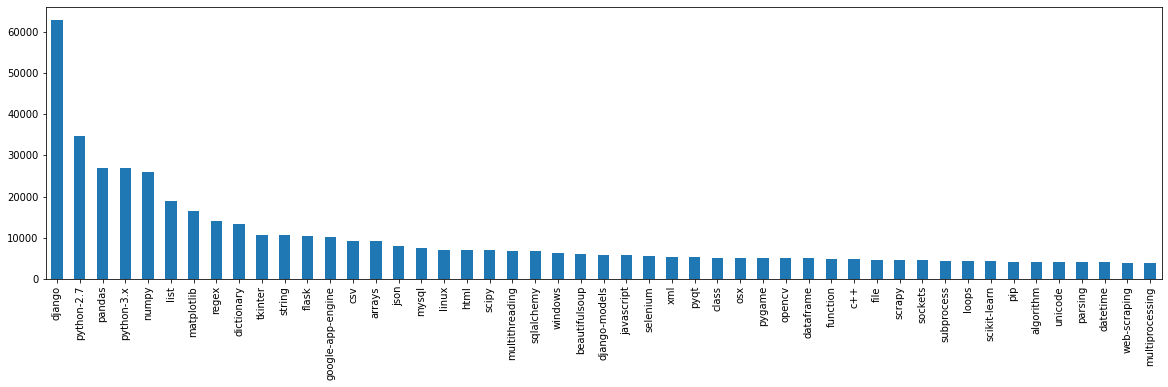

In [18]:
frequentTags[1:].plot.bar(figsize=(20,5))

In [19]:
print("Raw data from Questions Dataset: ",end="\n\n")
print(questions.Body[1])

Raw data from Questions Dataset: 

<p>I have a cross-platform (Python) application which needs to generate a JPEG preview of the first page of a PDF.</p>

<p>On the Mac I am spawning <a href="http://developer.apple.com/documentation/Darwin/Reference/ManPages/man1/sips.1.html">sips</a>.  Is there something similarly simple I can do on Windows?</p>



In [21]:
print(BeautifulSoup(questions.Body[1]).get_text())

I have a cross-platform (Python) application which needs to generate a JPEG preview of the first page of a PDF.
On the Mac I am spawning sips.  Is there something similarly simple I can do on Windows?

